# Final Capstone Project - IBM Data Science
## In London city, one of my friends is looking to open a restaurant
## In this analysis, I would like to recommend him a good place to open a restaurant

#### Importing the dataset

In [2]:
import pandas as pd

df_london = pd.read_excel('TFL Bus Safety.xlsx',
                       sheet_name='Sheet1')
                       #skiprows=range(20),
                       #skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [38]:
df_london.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Female,Elderly


In [4]:
df_london.columns

Index(['Year', 'Date Of Incident', 'Route', 'Operator', 'Group Name',
       'Bus Garage', 'Borough', 'Injury Result Description',
       'Incident Event Type', 'Victim Category', 'Victims Sex', 'Victims Age'],
      dtype='object')

#### For our project, we only require Borough column in our dataset

In [6]:
df_london_Borough=df_london[['Borough']]

In [7]:

df_london_Borough=df_london_Borough.rename(columns={"Borough":"Neighborhood"})
df_london_Borough.head()

,Neighborhood
0,Southwark
1,Islington
2,Havering
3,Westminster
4,Westminster


In [8]:
df_london_Borough=df_london_Borough.drop_duplicates(subset=["Neighborhood"])

In [9]:
df_london_Borough.head()

,Neighborhood
0,Southwark
1,Islington
2,Havering
3,Westminster
5,City of London


In [10]:
df_london_Borough.reset_index(drop=True)


,Neighborhood
0,Southwark
1,Islington
2,Havering
3,Westminster
4,City of London
5,Hammersmith & Fulham
6,Kensington & Chelsea
7,Brent
8,Camden
9,Hounslow


In [11]:
df_london_Borough.shape

(33, 1)

#### Importing the required libraries before processing our dataset further

In [12]:
import numpy as np # library to handle data in a vectorized manner

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

#### Installing Geocode to obtain the coordinates of each Borough/Neighborhood

In [15]:
%pip install geocoder
import geocoder # import geocoder

def get_latlng(borough):
# initialize your variable to None
    lat_lng_coords = None

# loop until you get the coordinates
    while(lat_lng_coords is None):
        g=geocoder.arcgis('London Borough of {}'.format(borough))
        lat_lng_coords=g.latlng
    return lat_lng_coords

     |████████████████████████████████| 102kB 6.6MB/s ta 0:00:011
     |████████████████████████████████| 92kB 6.9MB/s eta 0:00:011
     |████████████████████████████████| 829kB 8.5MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [16]:
coords=[get_latlng(borough) for borough in df_london_Borough["Neighborhood"].tolist()]


In [17]:
coords

[[51.50541000000004, -0.08920999999998003],
 [51.532790000000034, -0.1061399999999253],
 [51.54460488121069, -0.14410476132484631],
 [42.94171000000006, -81.20851999999996],
 [42.98690000000005, -81.24623999999994],
 [51.49617000000006, -0.22934999999995398],
 [51.50212000000005, -0.19438999999994167],
 [51.56549000000007, -0.27436999999997624],
 [51.53236000000004, -0.1279599999999732],
 [51.44730000000004, -0.4088799999999537],
 [51.442756717000066, -0.3125318239999615],
 [51.66629000000006, -0.040489999999977044],
 [51.57898000000006, -0.011219999999980246],
 [51.45677001110856, -0.19235992339429928],
 [51.54627000000005, -0.07244999999994661],
 [51.47457000000003, -0.24211999999994305],
 [51.460560000000044, -0.11725999999993064],
 [51.459160000000054, -0.012129999999956453],
 [51.593209478792595, -0.0833901391886536],
 [51.44162000000006, 0.14866000000006352],
 [51.41623949999999, -0.28723275000000575],
 [51.41564000000005, -0.19141999999993686],
 [51.404120000000034, 0.0199300000

In [18]:
df_coords=pd.DataFrame(coords,columns=['Latitude','Longitude'])
df_coords.shape


(33, 2)

In [19]:
df_london_Borough.shape

(33, 1)

In [20]:
df_london_Borough

,Neighborhood
0,Southwark
1,Islington
2,Havering
3,Westminster
5,City of London
6,Hammersmith & Fulham
15,Kensington & Chelsea
17,Brent
30,Camden
39,Hounslow


In [21]:
df_london_Borough=df_london_Borough.reset_index(drop=True)

In [22]:
df_london_Borough

,Neighborhood
0,Southwark
1,Islington
2,Havering
3,Westminster
4,City of London
5,Hammersmith & Fulham
6,Kensington & Chelsea
7,Brent
8,Camden
9,Hounslow


In [23]:
df_final=pd.concat([df_london_Borough, df_coords], axis=1, sort=False)

In [24]:
df_final


,Neighborhood,Latitude,Longitude
0,Southwark,51.505410,-0.089210
1,Islington,51.532790,-0.106140
2,Havering,51.544605,-0.144105
3,Westminster,42.941710,-81.208520
4,City of London,42.986900,-81.246240
5,Hammersmith & Fulham,51.496170,-0.229350
6,Kensington & Chelsea,51.502120,-0.194390
7,Brent,51.565490,-0.274370
8,Camden,51.532360,-0.127960
9,Hounslow,51.447300,-0.408880


## Final Dataset

In [25]:
print('The London, United Kingdom dataframe has {} boroughs.'.format(
        len(df_final['Neighborhood'].unique()),

    )
)

The London, United Kingdom dataframe has 33 boroughs.


In [26]:
address = 'London, UK'

geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Borough in London City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Borough in London City are 51.5073219, -0.1276474.


## Visualization of London city map

In [27]:
# create map of New York using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_final['Latitude'], df_final['Longitude'], df_final['Neighborhood']):
    label = '{}, UK'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [28]:
CLIENT_ID = '2HUT5S5QRRSHJ5RGMWJZZBAVQIAPCRWYJBZY4TSE51WHKIXE' # your Foursquare ID
CLIENT_SECRET = '1DJLBB0S0DXSKRC4GVZAHXGYWR1XL1ICBO1MEXSM3QULU1O3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2HUT5S5QRRSHJ5RGMWJZZBAVQIAPCRWYJBZY4TSE51WHKIXE
CLIENT_SECRET:1DJLBB0S0DXSKRC4GVZAHXGYWR1XL1ICBO1MEXSM3QULU1O3


In [29]:
neighborhood_latitude = df_final.loc[0, 'Latitude'] # borough latitude value
neighborhood_longitude = df_final.loc[0, 'Longitude'] # borough longitude value

neighborhood_name = df_final.loc[0, 'Neighborhood'] # borough name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Southwark are 51.50541000000004, -0.08920999999998003.


In [30]:
LIMIT = 100
radius=500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=2HUT5S5QRRSHJ5RGMWJZZBAVQIAPCRWYJBZY4TSE51WHKIXE&client_secret=1DJLBB0S0DXSKRC4GVZAHXGYWR1XL1ICBO1MEXSM3QULU1O3&v=20180605&ll=51.50541000000004,-0.08920999999998003&radius=500&limit=100'

In [31]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eec22fcdd0f850023a06068'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bermondsey',
  'headerFullLocation': 'Bermondsey, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 123,
  'suggestedBounds': {'ne': {'lat': 51.50991000450004,
    'lng': -0.0819938873629112},
   'sw': {'lat': 51.50090999550004, 'lng': -0.09642611263704885}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ac518eff964a52064ad20e3',
       'name': 'Borough Market',
       'location': {'address': 'Southwark St',
        'lat': 51.50549493508737,
        'lng': -0.09051835613656832,
        'distance': 91,
        'postalCode': 'SE1 1TL',
        'c

In [32]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [33]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Borough Market,Farmers Market,51.505495,-0.090518
1,Monmouth Coffee Company,Coffee Shop,51.505536,-0.091480
2,Padella,Italian Restaurant,51.505078,-0.089782
3,Richard Haward's Oysters,Seafood Restaurant,51.505412,-0.091047
4,Neal's Yard Dairy,Cheese Shop,51.505438,-0.091474


In [34]:
#Create a function to repeat the same process to all neightborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        #print(url)
        # make the GET request
        results = requests.get(url).json()
        venues=results["response"]["groups"][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venues])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
london_venues = getNearbyVenues(names=df_final['Neighborhood'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude']
                                  )

Southwark
Islington
Havering
Westminster
City of London
Hammersmith & Fulham
Kensington & Chelsea
Brent
Camden
Hounslow
Richmond Upon Thames
Enfield
Waltham Forest
Wandsworth
Hackney
Barnet
Lambeth
Lewisham
Croydon
Bexley
Kingston upon Thames
Merton
Bromley


In [224]:
london_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Southwark,51.505410,-0.089210,Borough Market,51.505495,-0.090518,Farmers Market
1,Southwark,51.505410,-0.089210,Monmouth Coffee Company,51.505536,-0.091480,Coffee Shop
2,Southwark,51.505410,-0.089210,Padella,51.505078,-0.089782,Italian Restaurant
3,Southwark,51.505410,-0.089210,Richard Haward's Oysters,51.505412,-0.091047,Seafood Restaurant
4,Southwark,51.505410,-0.089210,Neal's Yard Dairy,51.505438,-0.091474,Cheese Shop
...,...,...,...,...,...,...,...
1227,Tower Hamlets,51.520220,-0.054310,Whitechapel Market,51.519324,-0.059787,Market
1228,Tower Hamlets,51.520220,-0.054310,"Platform 2 (W'bound District, H&C)",51.519512,-0.060676,Platform
1229,Tower Hamlets,51.520220,-0.054310,Platform 5 (Overground),51.519289,-0.060971,Platform
1230,Tower Hamlets,51.520220,-0.054310,Whitechapel Fried Chicken,51.518936,-0.061216,Fried Chicken Joint


In [225]:
london_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barking & Dagenham,1,1,1,1,1,1
Barnet,25,25,25,25,25,25
Bexley,12,12,12,12,12,12
Brent,4,4,4,4,4,4
Bromley,40,40,40,40,40,40
Camden,63,63,63,63,63,63
City of London,67,67,67,67,67,67
Croydon,4,4,4,4,4,4
Ealing,84,84,84,84,84,84


In [226]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 231 uniques categories.


In [40]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio
0,Southwark,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Southwark,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Southwark,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Southwark,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Southwark,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Grouping the venues of London by their Neighborhood

In [41]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio
0,Barking & Dagenham,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,1.000000,0.000000,0.000000
1,Barnet,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2,Bexley,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
3,Brent,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
4,Bromley,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.025000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
5,Camden,0.000000,0.000000,0.000000,0.00,0.015873,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
6,City of London,0.000000,0.000000,0.000000,0.00,0.014925,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.014925,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
7,Croydon,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
8,Ealing,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.011905,0.000000,0.00,...,0.023810,0.000000,0.00,0.011905,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
9,Enfield,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000


In [42]:
num_top_venues = 5

for hood in london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking & Dagenham----
                           venue  freq
0                  Women's Store   1.0
1              Afghan Restaurant   0.0
2  Paper / Office Supplies Store   0.0
3                  Movie Theater   0.0
4                      Multiplex   0.0


----Barnet----
                venue  freq
0                Park  0.08
1                 Pub  0.08
2         Pizza Place  0.08
3      Farmers Market  0.08
4  Italian Restaurant  0.04


----Bexley----
                  venue  freq
0                   Pub  0.17
1  Fast Food Restaurant  0.17
2      Toy / Game Store  0.08
3        Breakfast Spot  0.08
4         Train Station  0.08


----Brent----
                           venue  freq
0                            Pub  0.25
1                    Supermarket  0.25
2                    Coffee Shop  0.25
3                 Sandwich Place  0.25
4  Paper / Office Supplies Store  0.00


----Bromley----
                  venue  freq
0        Clothing Store  0.15
1           Coffee Shop  0.12

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking & Dagenham,Women's Store,Yoga Studio,Empanada Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant
1,Barnet,Pizza Place,Farmers Market,Park,Pub,Sports Club,Breakfast Spot,French Restaurant,Lake,Restaurant,Gastropub
2,Bexley,Pub,Fast Food Restaurant,Train Station,Toy / Game Store,Indian Restaurant,Breakfast Spot,Italian Restaurant,Chinese Restaurant,Supermarket,Greek Restaurant
3,Brent,Pub,Supermarket,Coffee Shop,Sandwich Place,Yoga Studio,Empanada Restaurant,Flea Market,Fish Market,Fish & Chips Shop,Film Studio
4,Bromley,Clothing Store,Coffee Shop,Burger Joint,Pizza Place,Gym / Fitness Center,Donut Shop,Bar,English Restaurant,Stationery Store,Furniture / Home Store


### Using K-Means Clustering algorithm

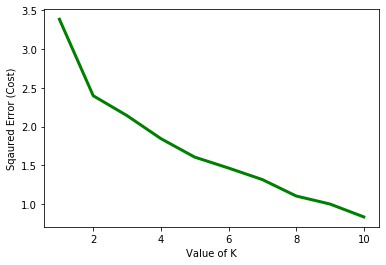

In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
london_grouped_clustering = london_grouped.drop('Neighborhood', 1)
cost =[] 
for i in range(1, 11): 
	KM = KMeans(n_clusters = i, max_iter = 500) 
	KM.fit(london_grouped_clustering) 
	
	# calculates squared error 
	# for the clustered points 
	cost.append(KM.inertia_)	 

# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

# the point of the elbow is the 
# most optimal value for choosing k 


In [46]:
 # set number of clusters
kclusters = 2

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [49]:
neighborhoods_venues_sorted.columns

Index(['Cluster Labels', 'Neighborhood', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue',
       '10th Most Common Venue'],
      dtype='object')

In [50]:
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = df_final

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

london_merged.head() # check the last columns!


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Southwark,51.505410,-0.089210,1,Coffee Shop,Hotel,Pub,Italian Restaurant,Café,Wine Bar,Portuguese Restaurant,Restaurant,Seafood Restaurant,Burger Joint
1,Islington,51.532790,-0.106140,1,Pub,Coffee Shop,Café,Burrito Place,Food Truck,Indian Restaurant,Mediterranean Restaurant,Mexican Restaurant,French Restaurant,Park
2,Havering,51.544605,-0.144105,1,Café,Pub,Market,Pharmacy,Grocery Store,Coffee Shop,Sandwich Place,Vegetarian / Vegan Restaurant,Flea Market,Ice Cream Shop
3,Westminster,42.941710,-81.208520,1,Pharmacy,Sandwich Place,Discount Store,High School,Park,Farmers Market,Ethiopian Restaurant,Event Space,Falafel Restaurant,Yoga Studio
4,City of London,42.986900,-81.246240,1,Pub,Coffee Shop,Sandwich Place,Hotel,Nightclub,Theater,Vegetarian / Vegan Restaurant,Restaurant,Bookstore,Pizza Place


In [51]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Neighborhood'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [52]:
#Cluster 1
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))                                                
                                                                                ]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,51.543932,Yoga Studio,Empanada Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant


In [53]:
#Cluster 2
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))                                                
                                                                                ]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,51.505410,Hotel,Pub,Italian Restaurant,Café,Wine Bar,Portuguese Restaurant,Restaurant,Seafood Restaurant,Burger Joint
1,51.532790,Coffee Shop,Café,Burrito Place,Food Truck,Indian Restaurant,Mediterranean Restaurant,Mexican Restaurant,French Restaurant,Park
2,51.544605,Pub,Market,Pharmacy,Grocery Store,Coffee Shop,Sandwich Place,Vegetarian / Vegan Restaurant,Flea Market,Ice Cream Shop
3,42.941710,Sandwich Place,Discount Store,High School,Park,Farmers Market,Ethiopian Restaurant,Event Space,Falafel Restaurant,Yoga Studio
4,42.986900,Coffee Shop,Sandwich Place,Hotel,Nightclub,Theater,Vegetarian / Vegan Restaurant,Restaurant,Bookstore,Pizza Place
5,51.496170,Coffee Shop,Sandwich Place,Gym / Fitness Center,Hotel,Clothing Store,Tapas Restaurant,Portuguese Restaurant,Gastropub,Café
6,51.502120,Hotel,Juice Bar,Café,Restaurant,Gym / Fitness Center,Art Gallery,Italian Restaurant,Burger Joint,Pub
7,51.565490,Supermarket,Coffee Shop,Sandwich Place,Yoga Studio,Empanada Restaurant,Flea Market,Fish Market,Fish & Chips Shop,Film Studio
8,51.532360,Breakfast Spot,Bar,Café,Train Station,Italian Restaurant,Chocolate Shop,Gastropub,Coffee Shop,Park
9,51.447300,Clothing Store,Discount Store,Pharmacy,Warehouse Store,Shopping Mall,Movie Theater,Park,Memorial Site,Portuguese Restaurant


## Recommendations
### From the above results, my observation is that there are lot of venues in the neighborhood that are grouped in Cluster 2. So, I would recommend my friend to open a new themed restaurant in the neighborhood of Cluster 1, so that there will not be huge competition and his restaurant will be talk of the town in Cluster 1 if he is good enough in his dishes. He will have lot of oppurtunities to improve his business and he can taste the success soon. In contrast, if he's opening up a restaurant in Cluster 2, since there are lot of venues, it will take a lot of time for him to establish his business.

### Thus, the Neighborhood analysis has been carried out for the London City using K-Means Clustering Algorithm
#### The purpose of this analysis is to find a best place to open a restaurant

## References
### https://www.coursera.org/learn/applied-data-science-capstone/ungradedLti/f0QY7/segmenting-and-clustering-neighborhoods-in-new-york-city
### London City Dataset : https://data.world/makeovermonday/2018w51
### Latitudes and Longitudes : https://www.coursera.org/learn/applied-data-science-capstone/
### K-Means best fit : https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
### K-Means Clustering : https://www.coursera.org/learn/machine-learning-with-python/ungradedLti/bAtxN/lab-k-means